In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
#plt.style.use('')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_csv('/content/data.csv')
df.head()

,Timestamp,Heart_Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,17/08/2015 15:09,139,41,92,140
1,17/08/2015 15:10,144,40,92,140
2,17/08/2015 15:11,140,42,89,144
3,17/08/2015 15:12,138,45,93,141
4,17/08/2015 15:13,133,42,94,134


In [3]:

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Timestamp                   226 non-null    datetime64[ns]
 1   Heart_Rate                  226 non-null    int64         
 2   Lifetouch Respiration Rate  226 non-null    int64         
 3   Oximeter SpO2               226 non-null    int64         
 4   Oximeter Pulse              226 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 9.0 KB


In [5]:
cols = ['Lifetouch Respiration Rate','Oximeter SpO2','Oximeter Pulse']
df.drop(cols,axis=1, inplace=True)
df.head()

,Timestamp,Heart_Rate
0,2015-08-17 15:09:00,139
1,2015-08-17 15:10:00,144
2,2015-08-17 15:11:00,140
3,2015-08-17 15:12:00,138
4,2015-08-17 15:13:00,133


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Timestamp   226 non-null    datetime64[ns]
 1   Heart_Rate  226 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.7 KB


In [7]:
df = df.set_index('Timestamp')
df.index

DatetimeIndex(['2015-08-17 15:09:00', '2015-08-17 15:10:00',
               '2015-08-17 15:11:00', '2015-08-17 15:12:00',
               '2015-08-17 15:13:00', '2015-08-17 15:14:00',
               '2015-08-17 15:15:00', '2015-08-17 15:16:00',
               '2015-08-17 15:17:00', '2015-08-17 15:18:00',
               ...
               '2015-08-17 18:45:00', '2015-08-17 18:46:00',
               '2015-08-17 18:47:00', '2015-08-17 18:48:00',
               '2015-08-17 18:49:00', '2015-08-17 18:50:00',
               '2015-08-17 18:51:00', '2015-08-17 18:52:00',
               '2015-08-17 18:53:00', '2015-08-17 18:54:00'],
              dtype='datetime64[ns]', name='Timestamp', length=226, freq=None)

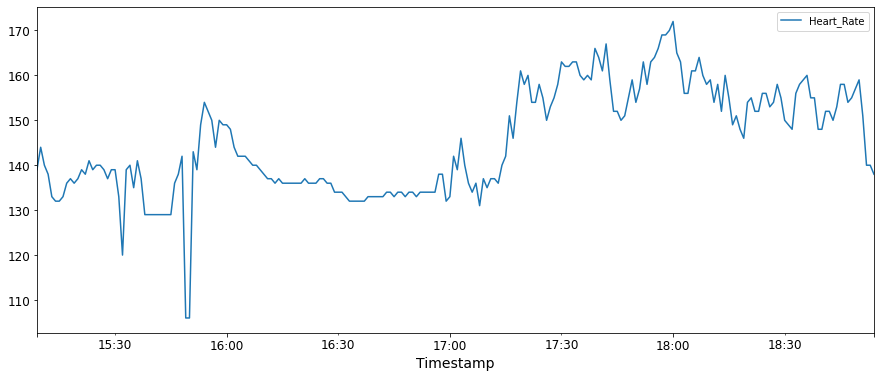

In [8]:
df.plot(figsize=(15, 6))
plt.show()

In [9]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [10]:
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2882.1251069896543
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2486.157167018785
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1581.1388297864355
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1476.6600352195292
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1589.020389294922
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1557.1025816248507
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1486.5136372632537
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1480.9732424490605
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2569.470463429123
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2195.499330267724
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1448.221213175213
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1330.9017915550614
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1462.9235022926332
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1407.467120638165
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1353.4125250259012
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1341.2409592922518
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1368.3426470905333
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1306.063262773032

In [11]:
#ARIMA(1, 1, 1)x(0, 1, 1, 12) 1231.16

In [12]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6329      0.138      4.579      0.000       0.362       0.904
ma.L1         -0.8565      0.105     -8.129      0.000      -1.063      -0.650
ma.S.L12      -1.0980      0.104    -10.603      0.000      -1.301      -0.895
sigma2        21.1788      2.805      7.550      0.000      15.681      26.677


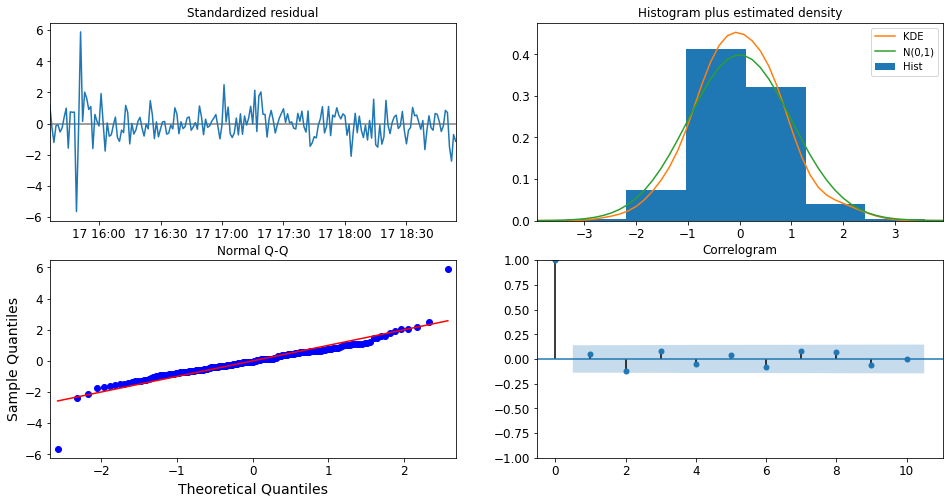

In [13]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

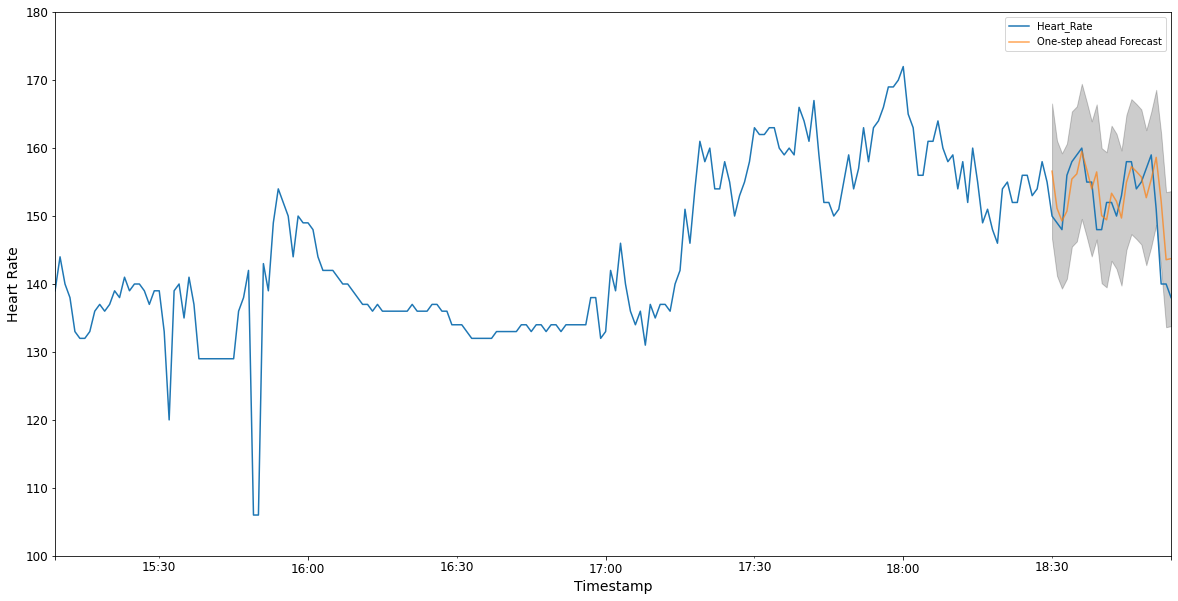

In [14]:
pred = results.get_prediction(start=pd.to_datetime('2015-08-17 18:30:00'), dynamic=False)
pred_ci = pred.conf_int()

ax = df['2015-08-17 14:00:00':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(20, 10))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Timestamp')
ax.set_ylabel('Heart Rate')
plt.legend()
plt.ylim(100,180)
plt.show()

In [15]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(226, 1)
(196, 1) (30, 1)


In [16]:
start=len(train)
end=len(train)+len(test)-1
pred=results.predict(start=start,end=end,typ='levels')
#print(pred)
pred.index=df.index[start:end+1]
print(pred)


Timestamp
2015-08-17 18:25:00    153.242853
2015-08-17 18:26:00    154.595548
2015-08-17 18:27:00    154.757622
2015-08-17 18:28:00    154.052423
2015-08-17 18:29:00    157.391246
2015-08-17 18:30:00    156.607121
2015-08-17 18:31:00    151.149648
2015-08-17 18:32:00    149.277543
2015-08-17 18:33:00    150.722282
2015-08-17 18:34:00    155.446611
2015-08-17 18:35:00    156.210134
2015-08-17 18:36:00    159.519591
2015-08-17 18:37:00    156.860624
2015-08-17 18:38:00    153.999717
2015-08-17 18:39:00    156.492721
2015-08-17 18:40:00    150.061210
2015-08-17 18:41:00    149.443347
2015-08-17 18:42:00    153.355731
2015-08-17 18:43:00    152.158419
2015-08-17 18:44:00    149.707080
2015-08-17 18:45:00    154.960066
2015-08-17 18:46:00    157.269812
2015-08-17 18:47:00    156.562867
2015-08-17 18:48:00    155.754697
2015-08-17 18:49:00    152.700116
2015-08-17 18:50:00    155.403538
2015-08-17 18:51:00    158.637953
2015-08-17 18:52:00    152.196657
2015-08-17 18:53:00    143.576600
2015

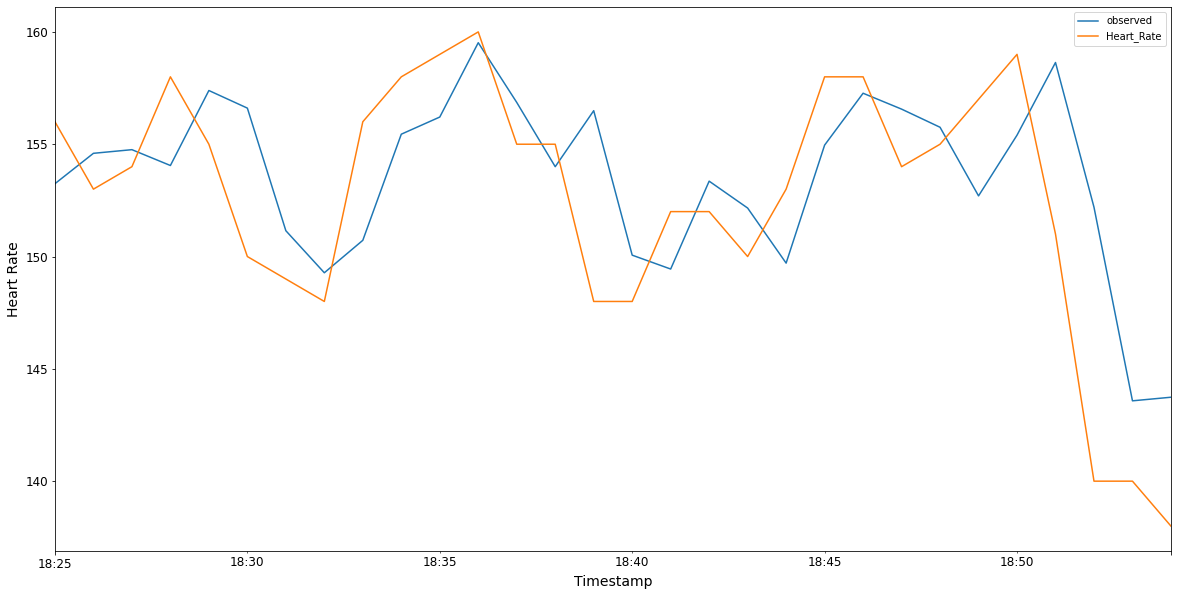

In [17]:
plt.figure(figsize=(20, 10))
pred.plot(legend=True,label='observed')
test['Heart_Rate'].plot(legend=True)
plt.xlabel('Timestamp')
plt.ylabel('Heart Rate')
plt.legend()

plt.show()

In [18]:
test['Heart_Rate'].mean()

152.63333333333333

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Heart_Rate']))
print(rmse)

4.203832121292469


In [20]:
mae = mean_absolute_error(pred,test['Heart_Rate'])
print(mae)

3.3165095090339265


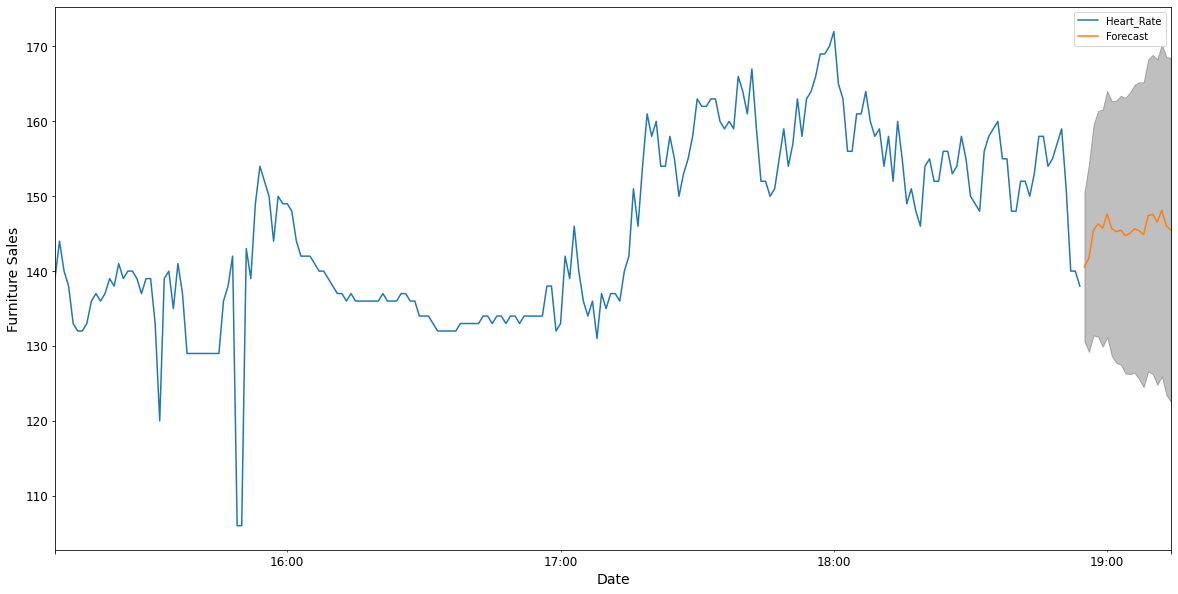

In [21]:
pred_uc = results.get_forecast(steps=20)
pred_ci = pred_uc.conf_int()

ax = df.plot(label='observed', figsize=(20, 10))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

In [22]:
forecasts = results.forecast(steps=20)
print(forecasts)

2015-08-17 18:55:00    140.548966
2015-08-17 18:56:00    141.779846
2015-08-17 18:57:00    145.461597
2015-08-17 18:58:00    146.316806
2015-08-17 18:59:00    145.743794
2015-08-17 19:00:00    147.609589
2015-08-17 19:01:00    145.680301
2015-08-17 19:02:00    145.270993
2015-08-17 19:03:00    145.448008
2015-08-17 19:04:00    144.742557
2015-08-17 19:05:00    145.040112
2015-08-17 19:06:00    145.648534
2015-08-17 19:07:00    145.400936
2015-08-17 19:08:00    144.861930
2015-08-17 19:09:00    147.423558
2015-08-17 19:10:00    147.569866
2015-08-17 19:11:00    146.548205
2015-08-17 19:12:00    148.130060
2015-08-17 19:13:00    146.021073
2015-08-17 19:14:00    145.498037
Freq: T, dtype: float64


## Forecast on Next 20 Heart Rate Observations

Using the best time series model ARIMA, we will make forecasts (Future preditions) and save the predictions to a .csv file named predictions.csv.

In [23]:
forecasts.to_csv('predictions.csv')